# Random Forest Regression Model 1
## Initial model without modification on the missing input data
Dropping all NaNs values in 'Critic_Score' column

### Objective
Predict the number of total sales based on different features

### Target Variable and Features
- Target variable (y) = Total_Sales
- X = Critic_Score, Genre, ESRB_Rating, Platform, Publisher, Developer_x

### Machine Learning Model
- model = RandomForestRegressor()

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Read data
games_df = pd.read_csv('Cleaned_Data/all_columns_df.csv')
games_df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09
...,...,...,...,...,...,...,...,...,...,...,...,...
19857,19858,FirePower for Microsoft Combat Flight Simulator 3,Simulation,T,PC,GMX Media,Shockwave Productions,NaN,NaN,2004.0,NaN,0.01
19858,19859,Tom Clancy's Splinter Cell,Shooter,T,PC,Ubisoft,Ubisoft,NaN,NaN,2003.0,Europe,0.01
19859,19860,Ashita no Joe 2: The Anime Super Remix,Fighting,NaN,PS2,Capcom,Capcom,NaN,NaN,2002.0,Japan,0.01
19860,19861,Tokyo Yamanote Boys for V: Main Disc,Adventure,NaN,PSV,Rejet,Rejet,NaN,NaN,2017.0,NaN,0.01


In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          19862 non-null  int64  
 1   Name          19862 non-null  object 
 2   Genre         19862 non-null  object 
 3   ESRB_Rating   13925 non-null  object 
 4   Platform      19862 non-null  object 
 5   Publisher     19862 non-null  object 
 6   Developer_x   19860 non-null  object 
 7   Critic_Score  4706 non-null   float64
 8   User_Score    238 non-null    float64
 9   Year          19859 non-null  float64
 10  Country       11877 non-null  object 
 11  Total_Sales   19862 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [4]:
# Change 'Year' dtype to object
games_df['Year'] = pd.to_datetime(games_df['Year'], format = '%Y').dt.strftime('%Y')

In [5]:
# Check correlation between critic score and total sales
d = games_df[['Critic_Score', 'Total_Sales']]
d.corr()

,Critic_Score,Total_Sales
Critic_Score,1.000000,0.263456
Total_Sales,0.263456,1.000000


In [6]:
# Drop columns
games_df.drop(['Rank', 'Name', 'User_Score', 'Country', 'Year'], axis=1, inplace=True)

In [7]:
games_df.count()

Genre           19862
ESRB_Rating     13925
Platform        19862
Publisher       19862
Developer_x     19860
Critic_Score     4706
Total_Sales     19862
dtype: int64

In [8]:
games_df.dropna().count()

Genre           4568
ESRB_Rating     4568
Platform        4568
Publisher       4568
Developer_x     4568
Critic_Score    4568
Total_Sales     4568
dtype: int64

In [9]:
games_df = games_df.dropna()
games_df.head(10)

,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,Total_Sales
0,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86
2,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14
4,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09
5,Role-Playing,E,GB,Nintendo,Game Freak,9.4,31.38
6,Platform,E,DS,Nintendo,Nintendo EAD,9.1,30.80
8,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,30.22
11,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,28.02
12,Party,E,X360,Microsoft Game Studios,Good Science Studio,6.7,24.00
13,Simulation,E,DS,Nintendo,Nintendo EAD,8.4,23.96
14,Racing,E,DS,Nintendo,Nintendo EAD,9.1,23.60


In [10]:
games_df.nunique()

Genre             20
ESRB_Rating        5
Platform          25
Publisher        216
Developer_x     1062
Critic_Score      86
Total_Sales      588
dtype: int64

## Bin and Encode Categorical Features

In [11]:
games_df.Genre.value_counts()

Action              775
Role-Playing        608
Shooter             555
Sports              546
Platform            389
Racing              330
Adventure           258
Fighting            250
Misc                250
Strategy            192
Simulation          161
Puzzle              121
Action-Adventure     86
Music                21
Party                13
MMO                   9
Sandbox               1
Board Game            1
Education             1
Visual Novel          1
Name: Genre, dtype: int64

In [12]:
# Keep top 14 of Genre
top_Genre = games_df.Genre.value_counts().index[0:14]
games_df.Genre = np.where(games_df.Genre.isin(top_Genre), games_df.Genre, 'other')
games_df.Genre.value_counts()

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_70248/1633828232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.Genre = np.where(games_df.Genre.isin(top_Genre), games_df.Genre, 'other')


Action              775
Role-Playing        608
Shooter             555
Sports              546
Platform            389
Racing              330
Adventure           258
Misc                250
Fighting            250
Strategy            192
Simulation          161
Puzzle              121
Action-Adventure     86
other                26
Music                21
Name: Genre, dtype: int64

In [13]:
games_df.Platform.value_counts()

X360    610
PS3     478
PC      404
PSP     400
PS2     358
Wii     340
GC      324
DS      312
GBA     297
PS      247
3DS     187
XB      110
NS      106
N64      97
PS4      93
WiiU     74
XOne     56
DC       29
GB       10
SNES     10
SAT       9
GBC       6
PSV       6
PSN       3
XBL       2
Name: Platform, dtype: int64

In [14]:
# Keep top 18 Platform
#top_Platform = games_df.Platform.value_counts().where(games_df.Platform.value_counts() > 100).index
top_Platform = games_df.Platform.value_counts().index[0:18]
games_df.Platform = np.where(games_df.Platform.isin(top_Platform), games_df.Platform, 'other')
games_df.Platform.value_counts()

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_70248/3864539743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.Platform = np.where(games_df.Platform.isin(top_Platform), games_df.Platform, 'other')


X360     610
PS3      478
PC       404
PSP      400
PS2      358
Wii      340
GC       324
DS       312
GBA      297
PS       247
3DS      187
XB       110
NS       106
N64       97
PS4       93
WiiU      74
XOne      56
other     46
DC        29
Name: Platform, dtype: int64

In [15]:
# Keep top 15 Publisher
top_Publisher = games_df.Publisher.value_counts().index[0:15]
games_df.Publisher = np.where(games_df.Publisher.isin(top_Publisher), games_df.Publisher, 'other')
games_df.Publisher.value_counts()

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_70248/556782955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.Publisher = np.where(games_df.Publisher.isin(top_Publisher), games_df.Publisher, 'other')


other                          1648
Nintendo                        410
Electronic Arts                 327
Activision                      304
Ubisoft                         301
Sega                            213
Sony Computer Entertainment     209
THQ                             201
EA Sports                       195
Capcom                          166
Konami                          163
Square Enix                     110
Atlus                            96
Atari                            79
Namco Bandai                     75
2K Sports                        71
Name: Publisher, dtype: int64

In [16]:
games_df.Developer_x.value_counts()

Capcom                                  99
EA Canada                               97
EA Tiburon                              87
Ubisoft Montreal                        86
Konami                                  69
                                        ..
Bugbear Entertainment                    1
Cing Inc. / Town Factory                 1
Soleil Software Studio Inc.              1
Q Entertainment / Phantagram             1
Blue Byte Software / Related Designs     1
Name: Developer_x, Length: 1062, dtype: int64

In [17]:
# Keep top 15 Developer_x
top_Developer_x = games_df.Developer_x.value_counts().index[0:15]
games_df.Developer_x = np.where(games_df.Developer_x.isin(top_Developer_x), games_df.Developer_x, 'other')
games_df.Developer_x.value_counts()

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_70248/2239024486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.Developer_x = np.where(games_df.Developer_x.isin(top_Developer_x), games_df.Developer_x, 'other')


other                      3682
Capcom                       99
EA Canada                    97
EA Tiburon                   87
Ubisoft Montreal             86
Konami                       69
Nintendo EAD                 65
Traveller's Tales            58
Visual Concepts              51
Square Enix                  47
Ubisoft                      42
Sonic Team                   41
Vicarious Visions            40
Namco                        37
Omega Force                  35
Neversoft Entertainment      32
Name: Developer_x, dtype: int64

In [18]:
games_df.nunique()

Genre            15
ESRB_Rating       5
Platform         19
Publisher        16
Developer_x      16
Critic_Score     86
Total_Sales     588
dtype: int64

In [20]:
games_df

,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,Total_Sales
0,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86
2,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14
4,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09
5,Role-Playing,E,other,Nintendo,other,9.4,31.38
6,Platform,E,DS,Nintendo,Nintendo EAD,9.1,30.80
...,...,...,...,...,...,...,...
19790,Fighting,T,other,other,other,8.4,0.01
19792,Shooter,T,PC,Activision,other,7.0,0.01
19794,Action,E,GBA,Atlus,other,6.0,0.01
19800,Puzzle,E,GBA,other,other,6.7,0.01


In [21]:
games_df.dtypes

Genre            object
ESRB_Rating      object
Platform         object
Publisher        object
Developer_x      object
Critic_Score    float64
Total_Sales     float64
dtype: object

In [22]:
# Encoding object dtype columns
cat = games_df.select_dtypes(include='object')
cat = list(cat.columns)
cat

['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer_x']

In [23]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(games_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)

encode_df

/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Music,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,...,Developer_x_Nintendo EAD,Developer_x_Omega Force,Developer_x_Sonic Team,Developer_x_Square Enix,Developer_x_Traveller's Tales,Developer_x_Ubisoft,Developer_x_Ubisoft Montreal,Developer_x_Vicarious Visions,Developer_x_Visual Concepts,Developer_x_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# Reset X dataframe index to merge with encode_df
games_df.reset_index(drop=True, inplace=True)
games_df

,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,Total_Sales
0,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86
1,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14
2,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09
3,Role-Playing,E,other,Nintendo,other,9.4,31.38
4,Platform,E,DS,Nintendo,Nintendo EAD,9.1,30.80
...,...,...,...,...,...,...,...
4563,Fighting,T,other,other,other,8.4,0.01
4564,Shooter,T,PC,Activision,other,7.0,0.01
4565,Action,E,GBA,Atlus,other,6.0,0.01
4566,Puzzle,E,GBA,other,other,6.7,0.01


In [25]:
# Merge one-hot encoded features and drop the originals
games_df = games_df.merge(encode_df, left_index=True, right_index=True)
games_df = games_df.drop(cat,1)
games_df

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_70248/2140457911.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  games_df = games_df.drop(cat,1)


,Critic_Score,Total_Sales,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Music,Genre_Platform,Genre_Puzzle,...,Developer_x_Nintendo EAD,Developer_x_Omega Force,Developer_x_Sonic Team,Developer_x_Square Enix,Developer_x_Traveller's Tales,Developer_x_Ubisoft,Developer_x_Ubisoft Montreal,Developer_x_Vicarious Visions,Developer_x_Visual Concepts,Developer_x_other
0,7.7,82.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.2,37.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,33.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.4,31.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.1,30.80,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,8.4,0.01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4564,7.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4565,6.0,0.01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4566,6.7,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Test and Train the Model

In [26]:
# Assign target and features
X = games_df.drop('Total_Sales', axis = 1)
y = games_df['Total_Sales'].values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=128, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [30]:
score = regressor.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.8995306838942349


In [31]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9353517956655095
Mean Squared Error: 3.814691193957929
Root Mean Squared Error: 1.9531234456526114


In [32]:
sorted(zip(regressor.feature_importances_, X.columns), reverse=True)

[(0.30862973988247616, 'Critic_Score'),
 (0.14078804311468485, 'Developer_x_Nintendo EAD'),
 (0.11263400007855032, 'Genre_Sports'),
 (0.03251292892561211, 'Platform_DS'),
 (0.029375598046084472, 'Publisher_Nintendo'),
 (0.027353637446893602, 'Genre_Role-Playing'),
 (0.021192866047375258, 'Platform_other'),
 (0.01965746763109818, 'Platform_Wii'),
 (0.018827037144698338, 'Genre_Platform'),
 (0.018452522094634372, 'Platform_X360'),
 (0.017563178338477658, 'ESRB_Rating_E'),
 (0.0169503656207334, 'Genre_Racing'),
 (0.016197607495154573, 'Genre_Misc'),
 (0.01300982588393112, 'Genre_Adventure'),
 (0.012998668435426691, 'Platform_PS4'),
 (0.011196459629662784, 'ESRB_Rating_M'),
 (0.011123024565571335, 'ESRB_Rating_T'),
 (0.010766920379852718, 'Publisher_Activision'),
 (0.010521787345841301, 'Publisher_other'),
 (0.009710871098710393, 'Platform_PS3'),
 (0.009322770003289384, 'Genre_Shooter'),
 (0.00900019025027106, 'Platform_PS2'),
 (0.008143767577425173, 'Publisher_Sony Computer Entertainment'

(0.0, 0.35)

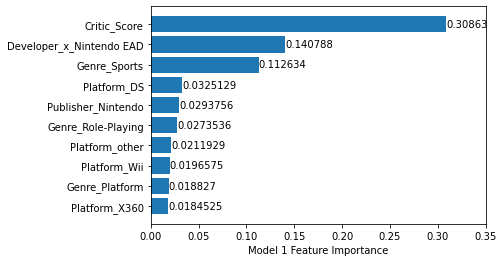

In [35]:
sorted_idx = regressor.feature_importances_.argsort()[-10:]
x = X.columns[sorted_idx]
y = regressor.feature_importances_[sorted_idx]

fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)
plt.xlabel("Model 1 Feature Importance")
plt.xlim(0.0,0.35)